<a href="https://colab.research.google.com/github/itakumi/B4-/blob/master/17B01590_report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning (second part): Intermediate report

*Write your name and your student ID below.*

In [ ]:
# Modify these lines.
student_name = 'Takumi Ito'
student_id = '17B01590'

Prepare an environment for running Python codes on Jupyter notebook. The most easiest way is to use [Google Colaboratory](https://colab.research.google.com/).

Write codes for the following four problems, and submit the notebook file (`.ipynb`) on OCW. **We do not accept a report in other formats (e.g., Word, PDF, HTML)**. You can use any deep learning library for completing this report. Write a code at the specified cell in the notebook. You can add more cells if necessary. Submit this report even if you cannot solve all problems.

These are the links to the sample codes used in the lecture:

+ [Binary classification](https://github.com/chokkan/deeplearning/blob/master/notebook/binary.ipynb)
+ [MNIST](https://github.com/chokkan/deeplearning/blob/master/notebook/mnist.ipynb)

*Please accept that your report may be shared among students who take this course.*

## 1. Multi-class classification on MNIST

Train a model on the training set of MNIST, and report the performance of the model on the test set in accuracy.

One can use the same code shown in the lecture. Write a code here and show the output.

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


device= cuda
will begin training
Epoch: 1 	Training Loss: 1.043097 	Training Accuracy: 0.695583 	Validation Loss: 0.345088 	Validation Accuracy: 0.902000
Validation loss decreased (inf --> 0.345088).  Saving model ...
Epoch: 2 	Training Loss: 0.396654 	Training Accuracy: 0.881333 	Validation Loss: 0.267081 	Validation Accuracy: 0.917833
Validation loss decreased (0.345088 --> 0.267081).  Saving model ...
Epoch: 3 	Training Loss: 0.318624 	Training Accuracy: 0.904104 	Validation Loss: 0.212754 	Validation Accuracy: 0.937583
Validation loss decreased (0.267081 --> 0.212754).  Saving model ...
Epoch: 4 	Training Loss: 0.282599 	Training Accuracy: 0.914125 	Validation Loss: 0.186739 	Validation Accuracy: 0.944750
Validation loss decreased (0.212754 --> 0.186739).  Saving model ...
Epoch: 5 	Training Loss: 0.257202 	Training Accuracy: 0.925167 	Validation Loss: 0.168678 	Validation Accuracy: 0.950250
Validation loss decreased (0.186739 --> 0.168678).  Saving model ...
Epoch: 6 	Training Los

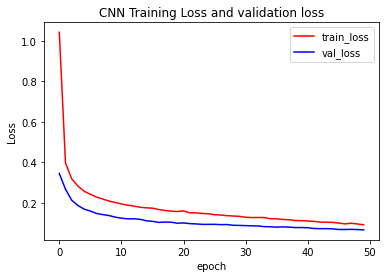

<Figure size 432x288 with 0 Axes>

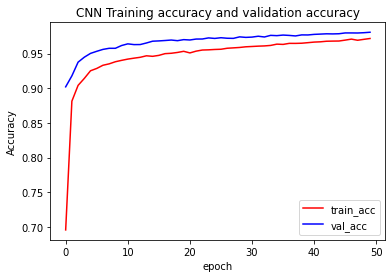

<Figure size 432x288 with 0 Axes>

In [1]:
from __future__ import print_function
import sys, os
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
num_workers = 0
batch_size = 100
# 検証データ用の割合
valid_size = 0.2
# torch.FloatTensor型へ変換
transform = transforms.ToTensor()
# datasetsからデータを取得
train_data = datasets.MNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'data', train = False, download = True, transform = transform)

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
# trainとvalidの境目(split)を指定
split = int(np.floor(valid_size * num_train))
train_index, valid_index = indices[split:], indices[:split]

# samplerの準備
train_sampler = SubsetRandomSampler(train_index)
valid_sampler = SubsetRandomSampler(valid_index)
# data loaderの準備
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size,
                                           sampler = train_sampler, num_workers = num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size,
                                          sampler = valid_sampler, num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size,
                                         num_workers = num_workers)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

def train():
    print("will begin training")
    # minimum validation loss を最初は無限とする
    valid_loss_min = np.Inf

    for epoch in range(n_epochs):
        # それぞれの値を初期化
        train_loss_total = 0
        train_acc_total = 0
        valid_loss_total = 0
        valid_acc_total = 0

        # 学習
        model.train() # ネットワークを学習モードへ
        for data,label in train_loader:
            data, label = data.to(device), label.to(device)
            optimizer.zero_grad() # 勾配結果を0にリセット
            output = model(data) #順伝搬:入力dataをもとに出力outputを計算
            loss = criterion(output,label) #　損失を計算
            # 出力と結果が一致している個数を計算
            _,pred = torch.max(output,1)
            train_acc_total += np.squeeze(pred.eq(label.data.view_as(pred)).sum())
            loss.backward() #逆伝搬の計算
            optimizer.step() #重みの更新
            # training lossの計算
            train_loss_total += loss.item() * data.size(0)

        # 検証
        model.eval()  # ネットワークを推論モードへ
        with torch.no_grad():
            for data,label in valid_loader:
                data, label = data.to(device), label.to(device)
                output = model(data) #順伝搬:入力dataをもとに出力outputを計算
                loss = criterion(output,label) # 損失を計算
                # 出力と結果が一致している個数を計算
                _,pred = torch.max(output,1)
                valid_acc_total += np.squeeze(pred.eq(label.data.view_as(pred)).sum())
                # validation lossの計算
                valid_loss_total += loss.item() * data.size(0)

        # epoch毎のloss and accuracyを計算
        train_loss = train_loss_total / len(train_loader.sampler)
        train_acc = train_acc_total.item() / len(train_loader.sampler)
        valid_loss = valid_loss_total / len(valid_loader.sampler)
        valid_acc = valid_acc_total.item() / len(valid_loader.sampler)

        print('Epoch: {} \tTraining Loss: {:.6f} \tTraining Accuracy: {:.6f} \tValidation Loss: {:.6f} \tValidation Accuracy: {:.6f}'.format(
            epoch+1,
            train_loss,
            train_acc,
            valid_loss,
            valid_acc
            ))

        # validation lossが減ったら更新
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'CNNmodel.pt')
            valid_loss_min = valid_loss

        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['valid_loss'].append(valid_loss)
        history['valid_acc'].append(valid_acc)

def test():
    # テスト
    test_loss_total=0.0
    test_acc_total=0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    model.eval() # ネットワークを推論モードへ
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data) # 順伝搬:入力dataをもとに出力outputを計算
            loss = criterion(output, target) # 損失を計算
            # 予想と正解を比べる
            _, pred = torch.max(output, 1) # indices
            correct = np.squeeze(pred.eq(target.data.view_as(pred)))
            test_acc_total += np.squeeze(pred.eq(target.data.view_as(pred)).sum())
            # test lossの計算
            test_loss_total += loss.item()*data.size(0)
            # 0~9までそれぞれの正答率を計算
            for i in range(len(target)):
                label = target.data[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1
    # test lossの平均を計算
    test_loss = test_loss_total / len(test_loader.sampler)
    test_acc = test_acc_total.item() / len(test_loader.sampler)
    print('Test Loss: {:.6f}\n'.format(test_loss))
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

def plot():
    plt.figure()
    plt.plot(range(n_epochs), history['train_loss'], label='train_loss', color='red')
    plt.plot(range(n_epochs), history['valid_loss'], label='val_loss', color='blue')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.title('CNN Training Loss and validation loss')
    plt.legend()
    plt.show()
    plt.savefig('CNN_Loss.png')

    plt.figure()
    plt.plot(range(n_epochs), history['train_acc'], label='train_acc', color='red')
    plt.plot(range(n_epochs), history['valid_acc'], label='val_acc', color='blue')
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')
    plt.title('CNN Training accuracy and validation accuracy')
    plt.legend()
    plt.show()
    plt.savefig('CNN_Accuracy.png')

if __name__ == '__main__':
    # 学習回数
    n_epochs = 50 #エポック数
    # 学習結果の保存用
    history = { #各値を保存する変数
        'train_loss': [],
        'train_acc': [],
        'valid_loss': [],
        'valid_acc': [],
        'test_loss': [],
        'test_acc': [],
    }
    flag = os.path.isfile('CNNmodel.pt')
    use_cuda=torch.cuda.is_available()
    if use_cuda:
        device = 'cuda'
    else:
        device = 'cpu'
    print("device=",device)
    model = Net().to(device)
    # loss function を求める
    criterion = nn.CrossEntropyLoss()
    # optimizer = SGD and learning rate = 0.01
    optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)
    if flag:
        print('loading parameters...')
        model.load_state_dict(torch.load("CNNmodel.pt"))
        print('parameters loaded')
    if n_epochs != 0:
        train()
    test()
    if flag == False:
        plot()

## 2. Confusion matrix

Show a confusion matrix of the predictions of the model on the test set. This is an example of a confusion matrix.

![example](https://github.com/chokkan/deeplearningclass/blob/master/assignment/example-confusion-matrix.png?raw=1)

Write a code here and show the confusion matrix.

In [2]:
Confusion_matrix = torch.zeros(10, 10,dtype=torch.int)
def test():
    model.eval() # ネットワークを推論モードへ
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data) # 順伝搬:入力dataをもとに出力outputを計算
            # 予想と正解を比べる
            _, pred = torch.max(output, 1) # indices
            # 0~9までそれぞれの正答率を計算
            for i in range(len(target)):
                label = target.data[i]
                #labelには正解、predには予測結果が格納
                Confusion_matrix[label.item()][pred[i].item()]+=1
if __name__ == '__main__':
  test()
  print(Confusion_matrix)


tensor([[ 973,    0,    1,    0,    1,    1,    1,    1,    2,    0],
        [   0, 1127,    2,    2,    0,    1,    2,    0,    1,    0],
        [   5,    0, 1014,    1,    2,    0,    0,    6,    4,    0],
        [   0,    0,    2,  997,    0,    2,    0,    5,    4,    0],
        [   0,    0,    3,    0,  969,    0,    3,    1,    1,    5],
        [   2,    0,    0,    6,    1,  875,    3,    0,    3,    2],
        [   4,    3,    1,    1,    4,    4,  940,    0,    1,    0],
        [   2,    2,   11,    5,    0,    0,    0, 1002,    0,    6],
        [   5,    1,    1,    3,    3,    2,    1,    3,  952,    3],
        [   4,    4,    0,    6,    8,    1,    0,    6,    3,  977]],
       dtype=torch.int32)


## 3. Top-3 easy and confusing examples

Show the top three easy and three confusing, respectively, images where the model recognized their digits with strong confidences. More specifically, let $y_n$ and $\hat{y}_n$ the true and predicted, respectively, digits of the image $x_n$. We want to find three images with high $P(\hat{y}_n | x_n)$ when $y_n = \hat{y}_n$ (for easy three examples) and $y_n \neq \hat{y}_n$ (for confusing three examples).

For each example, please show $y_n$, $P(y_n | x_n)$, $\hat{y}_n$, and $P(\hat{y}_n | x_n)$ together with the image $x_n$. This is an example of an output for an image (you need this kind of outputs for top-three easy and top-three confusing images, in other words, for six images in total).

![example](https://github.com/chokkan/deeplearningclass/blob/master/assignment/example-confusing-sample.png?raw=1)

Write a code here and show the output.

最終正解数= 9826
最終不正解数= 174
正解Top3
1 位
予想は 0.0
正解は 0.0
確率は 100.0 %


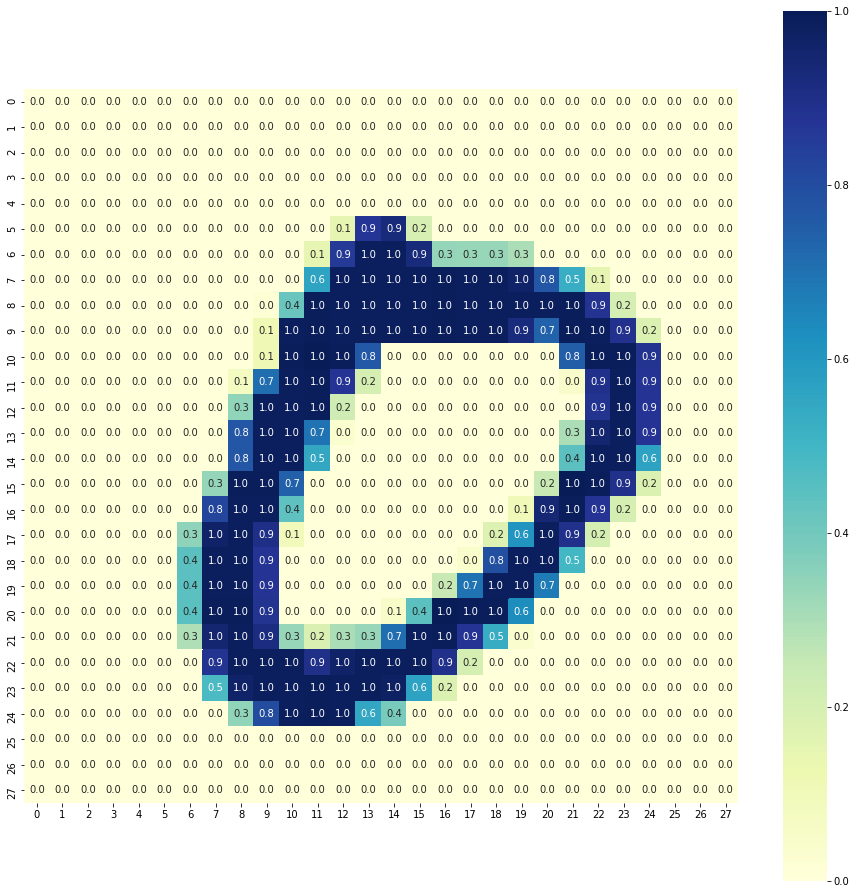

2 位
予想は 5.0
正解は 5.0
確率は 100.0 %


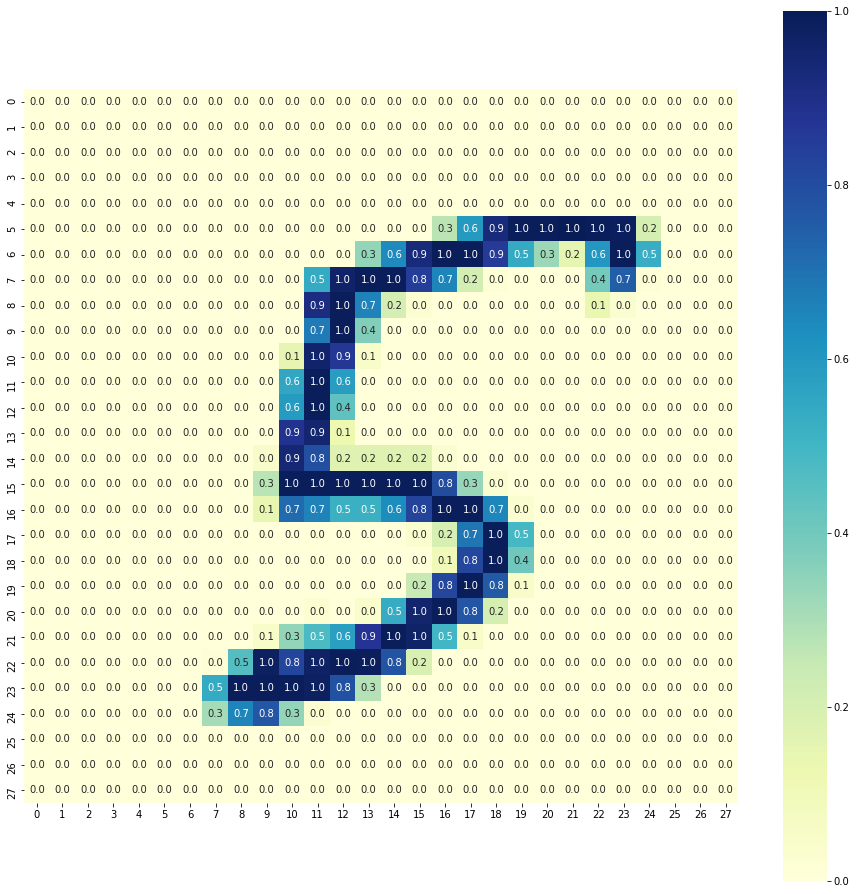

3 位
予想は 5.0
正解は 5.0
確率は 100.0 %


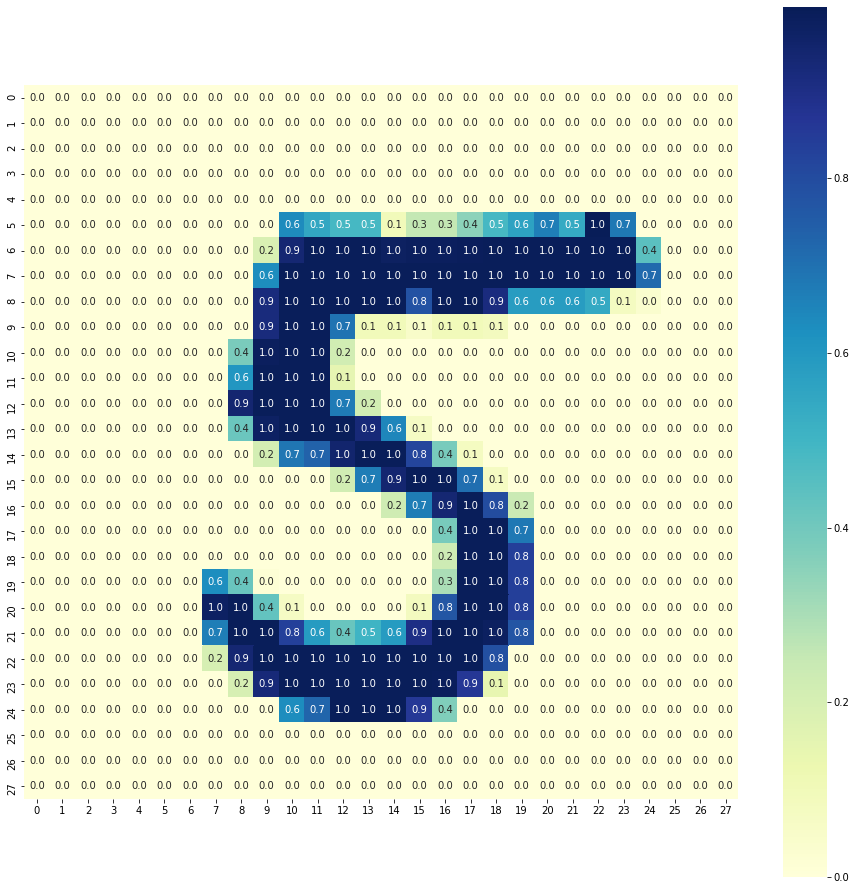

不正解Top3
1 位
予想は 4.0
正解は 6.0
確率は 99.97919201850891 %


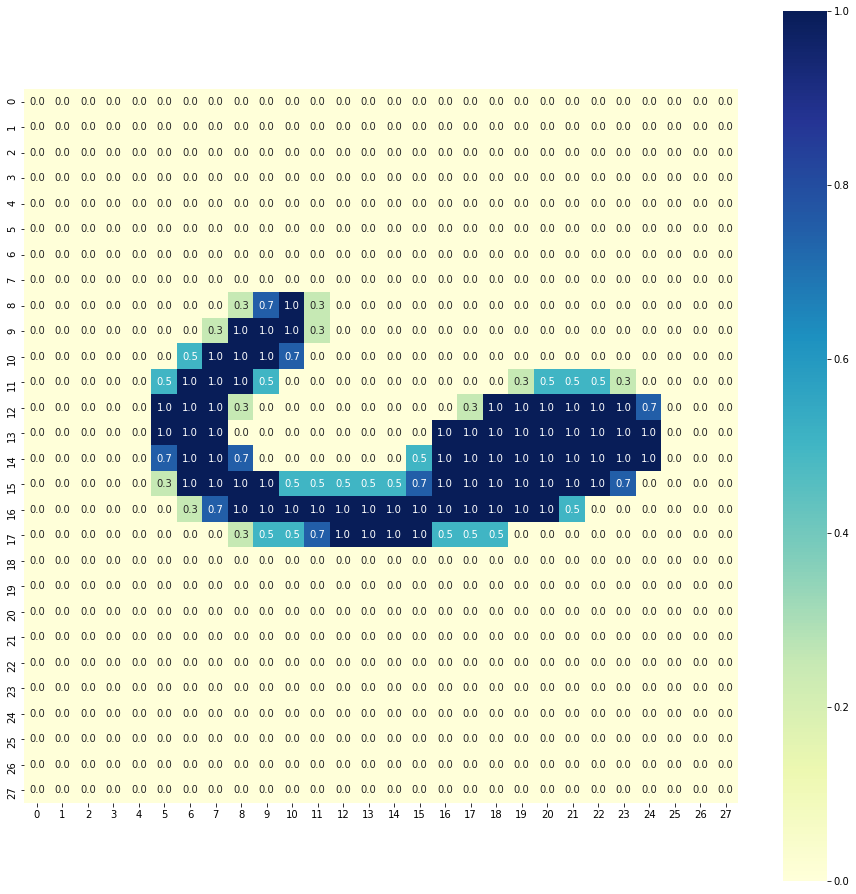

2 位
予想は 7.0
正解は 3.0
確率は 99.4562566280365 %


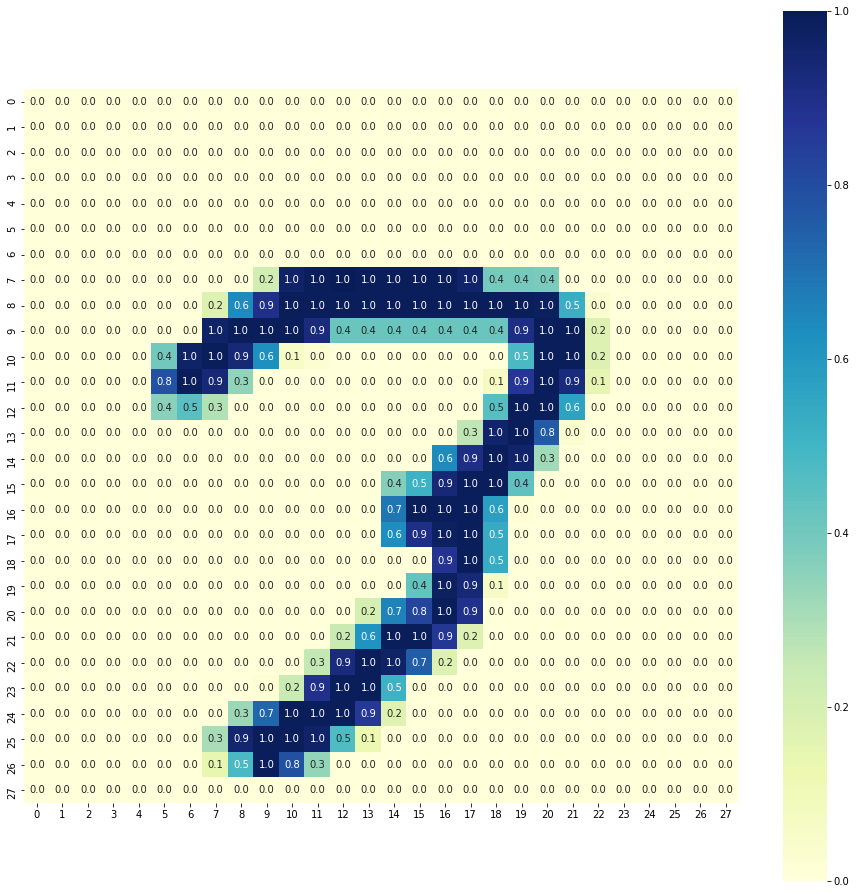

3 位
予想は 2.0
正解は 7.0
確率は 99.41397905349731 %


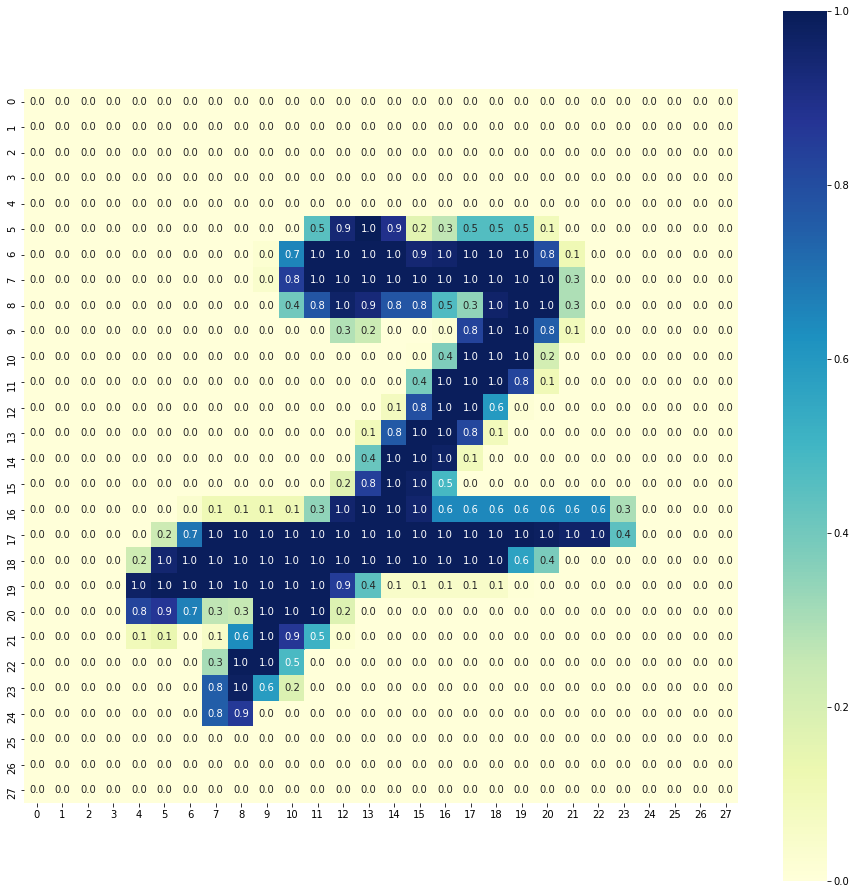

In [11]:
import seaborn as sns
Correct_max=torch.zeros(10000,1,28,28) #予想が正しいデータ上位3つ
Correct_max_label=torch.zeros(10000) #ラベル
Correct_max_answer_label=torch.zeros(10000) #正解ラベル
Correct_max_p=torch.zeros(10000) #確率

Incorrect_max=torch.zeros(1000,1,28,28) #予想が間違っているデータ上位3つ
Incorrect_max_label=torch.zeros(1000) #ラベル
Incorrect_max_answer_label=torch.zeros(1000) #正解ラベル
Incorrect_max_p=torch.zeros(1000) #確率

model.eval() # ネットワークを推論モードへ
def test():
    global Correct_max
    global Correct_max_label
    model.eval() # ネットワークを推論モードへ
    Correct_iter=0
    Incorrect_iter=0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data) # 順伝搬:入力dataをもとに出力outputを計算
            prob = torch.nn.functional.softmax(output[0], dim=0)
            # 最大値を取得
            value_max, pred_max = torch.max(output, 1)
            for i in range(100):
              prob = torch.nn.functional.softmax(output[i], dim=0)
              if pred_max[i].item()==target[i].item():
                #予測が正しい時
                Correct_max[Correct_iter]=data[i]
                Correct_max_label[Correct_iter]=pred_max[i]
                Correct_max_answer_label[Correct_iter]=target[i]
                Correct_max_p[Correct_iter]=prob[int(Correct_max_label[Correct_iter].item())]
                Correct_iter+=1
              else:
                #予測がまちがって いる時
                Incorrect_max[Incorrect_iter]=data[i]
                Incorrect_max_label[Incorrect_iter]=pred_max[i]
                Incorrect_max_answer_label[Incorrect_iter]=target[i]
                Incorrect_max_p[Incorrect_iter]=prob[int(Incorrect_max_label[Incorrect_iter].item())]
                Incorrect_iter+=1

    print("最終正解数=",Correct_iter)
    print("最終不正解数=",Incorrect_iter)
def plot():
    Correct_max_numpy=np.zeros((3,28,28))
    Incorrect_max_numpy=np.zeros((3,28,28))

    Correct_val,Correct_index=torch.topk(Correct_max_p,k=3)
    Incorrect_val,Incorrect_index=torch.topk(Incorrect_max_p,k=3)

    Correct_max_numpy[0] = Correct_max[Correct_index[0].item()].to('cpu').detach().numpy().copy()
    Correct_max_numpy[1] = Correct_max[Correct_index[1].item()].to('cpu').detach().numpy().copy()
    Correct_max_numpy[2] = Correct_max[Correct_index[2].item()].to('cpu').detach().numpy().copy()

    Incorrect_max_numpy[0] = Incorrect_max[Incorrect_index[0].item()].to('cpu').detach().numpy().copy()
    Incorrect_max_numpy[1] = Incorrect_max[Incorrect_index[1].item()].to('cpu').detach().numpy().copy()
    Incorrect_max_numpy[2] = Incorrect_max[Incorrect_index[2].item()].to('cpu').detach().numpy().copy()

    #結果を出力
    print("正解Top3")
    for i in range(3):
      print(i+1,"位")
      print("予想は",Correct_max_label[Correct_index[i].item()].item())
      print("正解は",Correct_max_answer_label[Correct_index[i].item()].item())
      print("確率は",Correct_max_p[Correct_index[i].item()].item()*100,"%")
      f, ax = plt.subplots(figsize=(16, 16))
      sns.heatmap(Correct_max_numpy[i].reshape(28,28), annot=True, fmt='.1f', square=True, cmap="YlGnBu")
      plt.show()

    print("不正解Top3")
    for i in range(3):
      print(i+1,"位")
      print("予想は",Incorrect_max_label[Incorrect_index[i].item()].item())
      print("正解は",Incorrect_max_answer_label[Incorrect_index[i].item()].item())
      print("確率は",Incorrect_max_p[Incorrect_index[i].item()].item()*100,"%")
      f, ax = plt.subplots(figsize=(16, 16))
      sns.heatmap(Incorrect_max_numpy[i].reshape(28,28), annot=True, fmt='.1f', square=True, cmap="YlGnBu")
      plt.show()            

if __name__ == '__main__':
  test()
  plot()


## 4. Recognize your handwritten digits

Prepare three image files each of which presents a digit written by you. For each image, apply the MNIST model you trained, and show the probability estimate $\hat{y} \in \mathbb{R}^{10}$ (10-dimensional vector) for all possible digits as well as the image itself.

Please refer to [this notebook](https://colab.research.google.com/notebooks/io.ipynb) about how to upload a file to Google Colaboratory.

### Image #1

Write the code to show the image #1 here.

In [4]:
from PIL import Image, ImageOps
import urllib
import io
import cv2

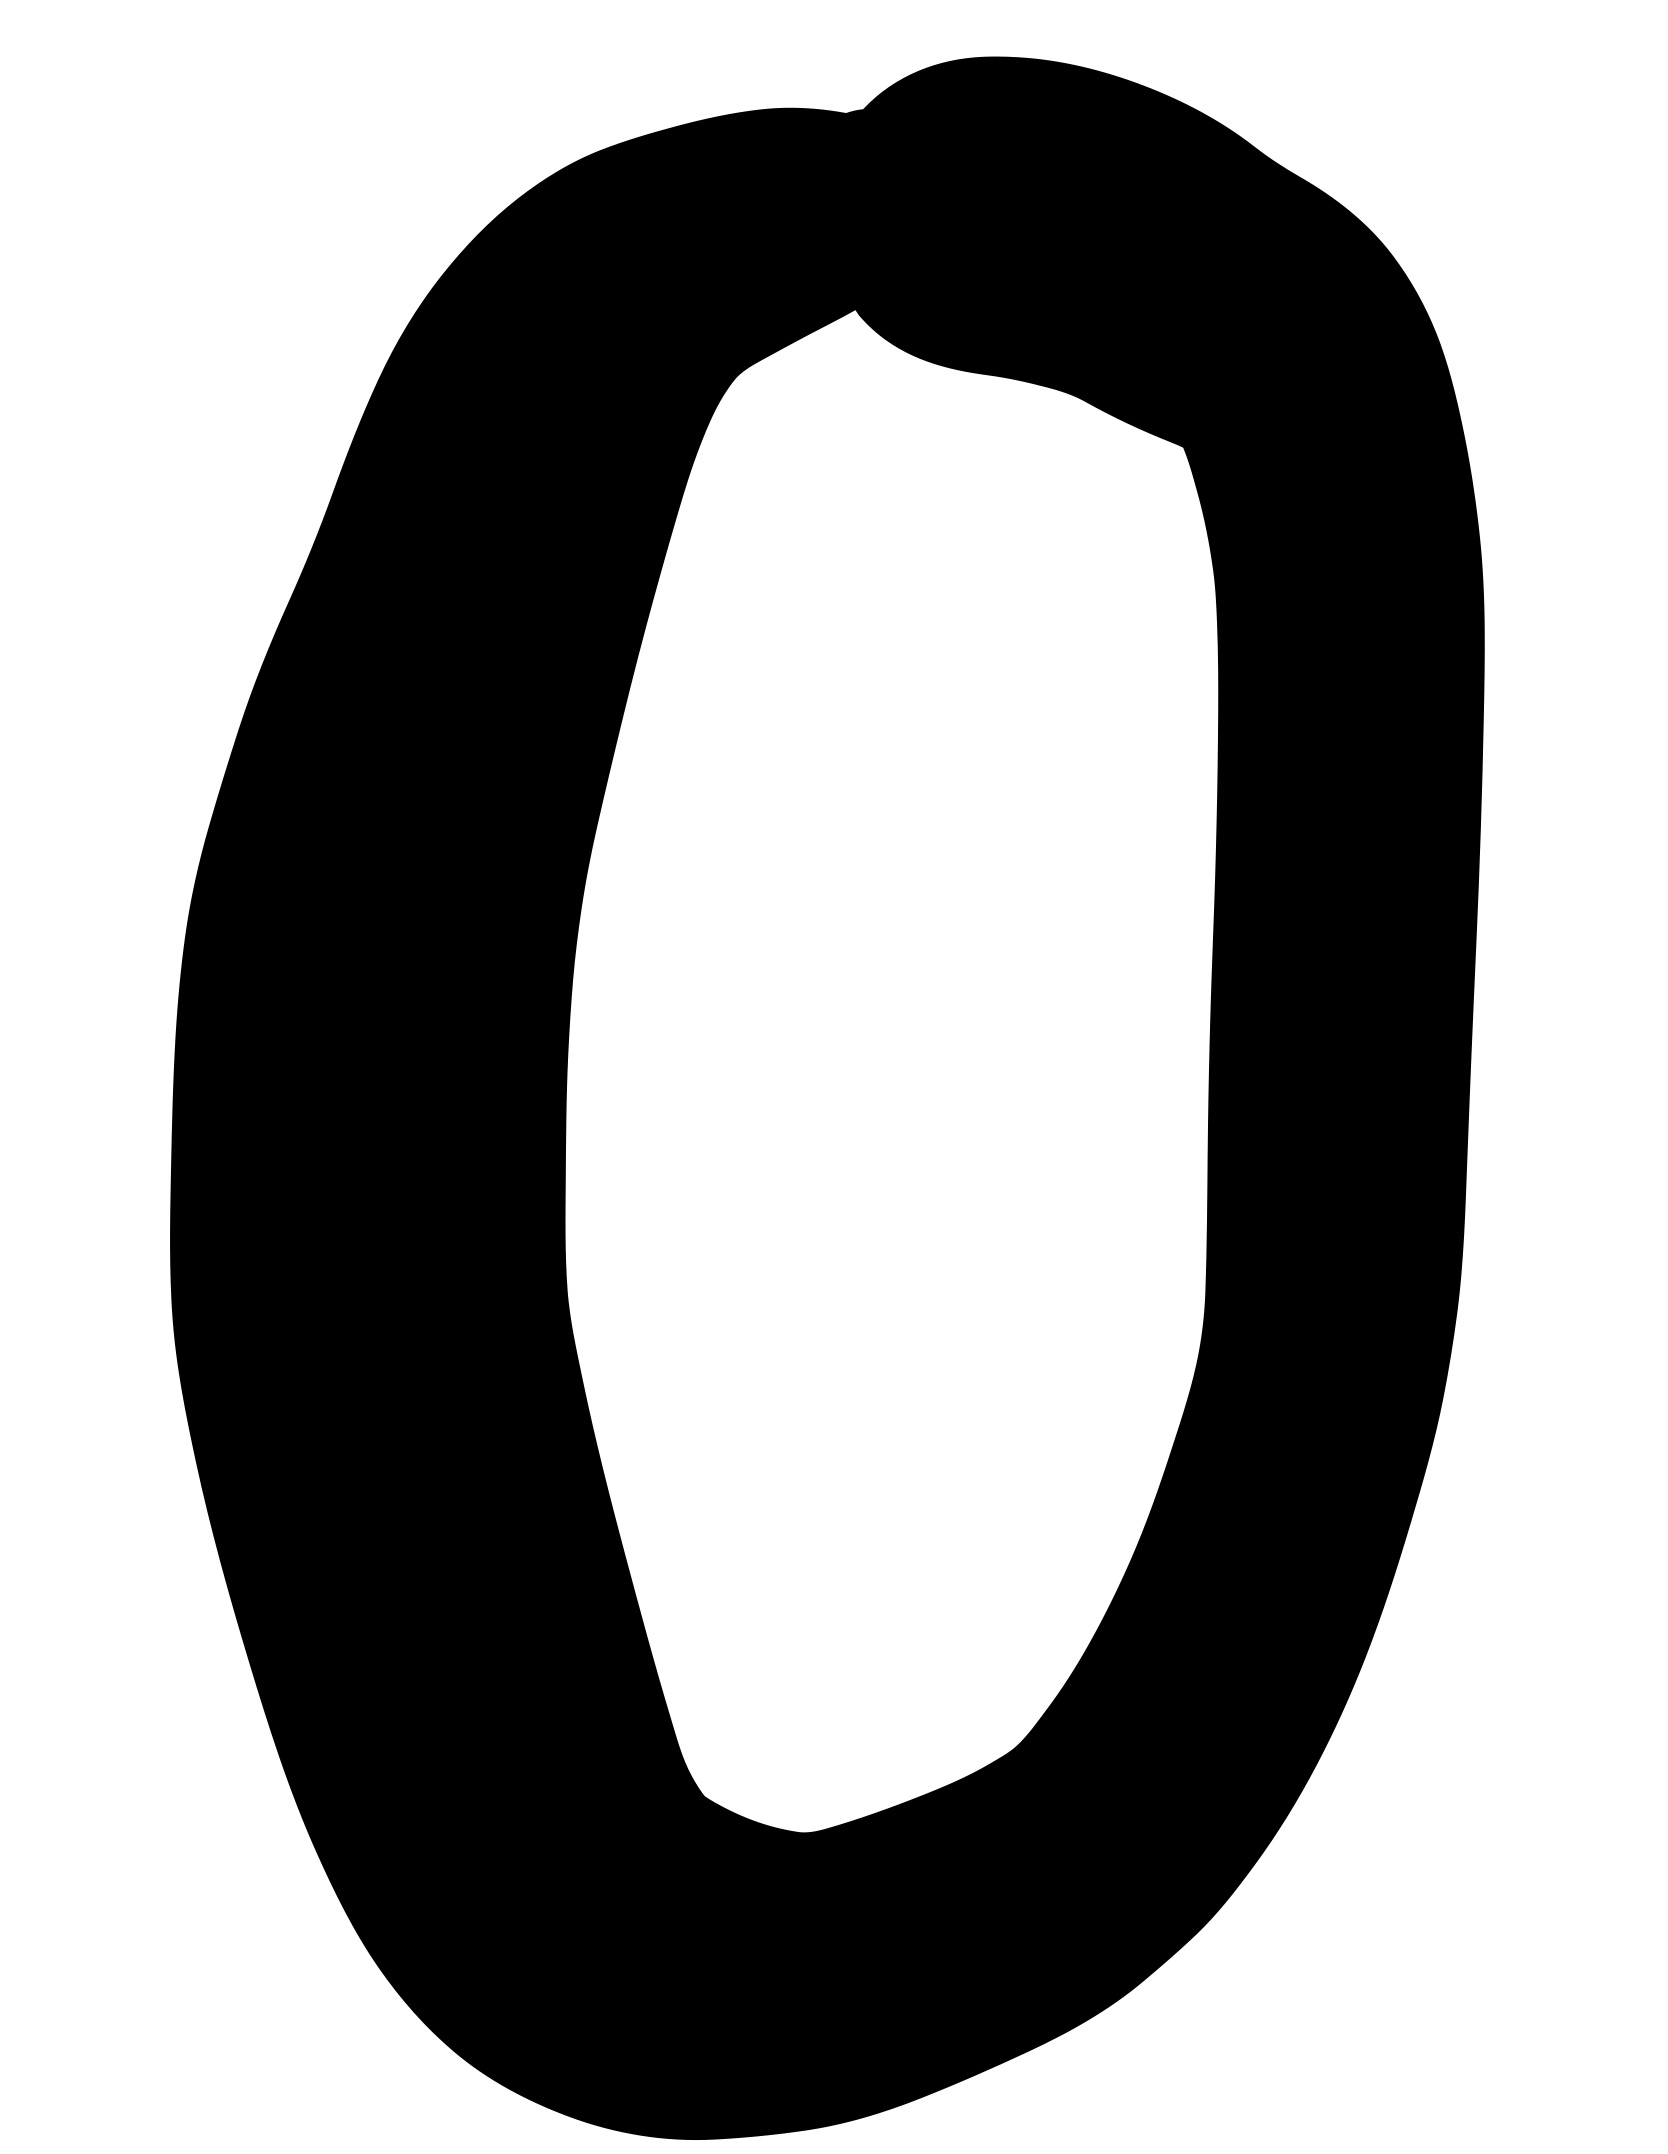

In [5]:
image1 = Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/itakumi/B4-/master/AdvancedMachineLearning/0.jpg'))
image1

Write the code to show the probability estimate $\hat{y} \in \mathbb{R}^{10}$ for the image.

In [6]:
image1 = ImageOps.invert(image1.convert('L')).resize((28,28))
transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])
# 元のモデルに合わせて次元を追加
image1 = transform(image1).unsqueeze(0)
# GPUへの転送
if torch.cuda.is_available():
    image1 = image1.to('cuda')
    model.to('cuda')

model.eval() # ネットワークを推論モードへ
# 予測を実施
output = model(image1)
_, prediction = torch.max(output, 1)
prob = torch.nn.functional.softmax(output[0], dim=0)
# 予測結果の上位5つを取得
_, indices = torch.topk(output[0], 5, dim=0)

# 結果を出力
for index in indices:
    i = index.item()
    print(i, prob[i].item())

0 1.0
5 1.1500335794778493e-08
6 1.2893124068380502e-10
2 1.204883445755445e-14
1 1.8979396111594428e-17


### Image #2

Write the code to show the image #2 here.

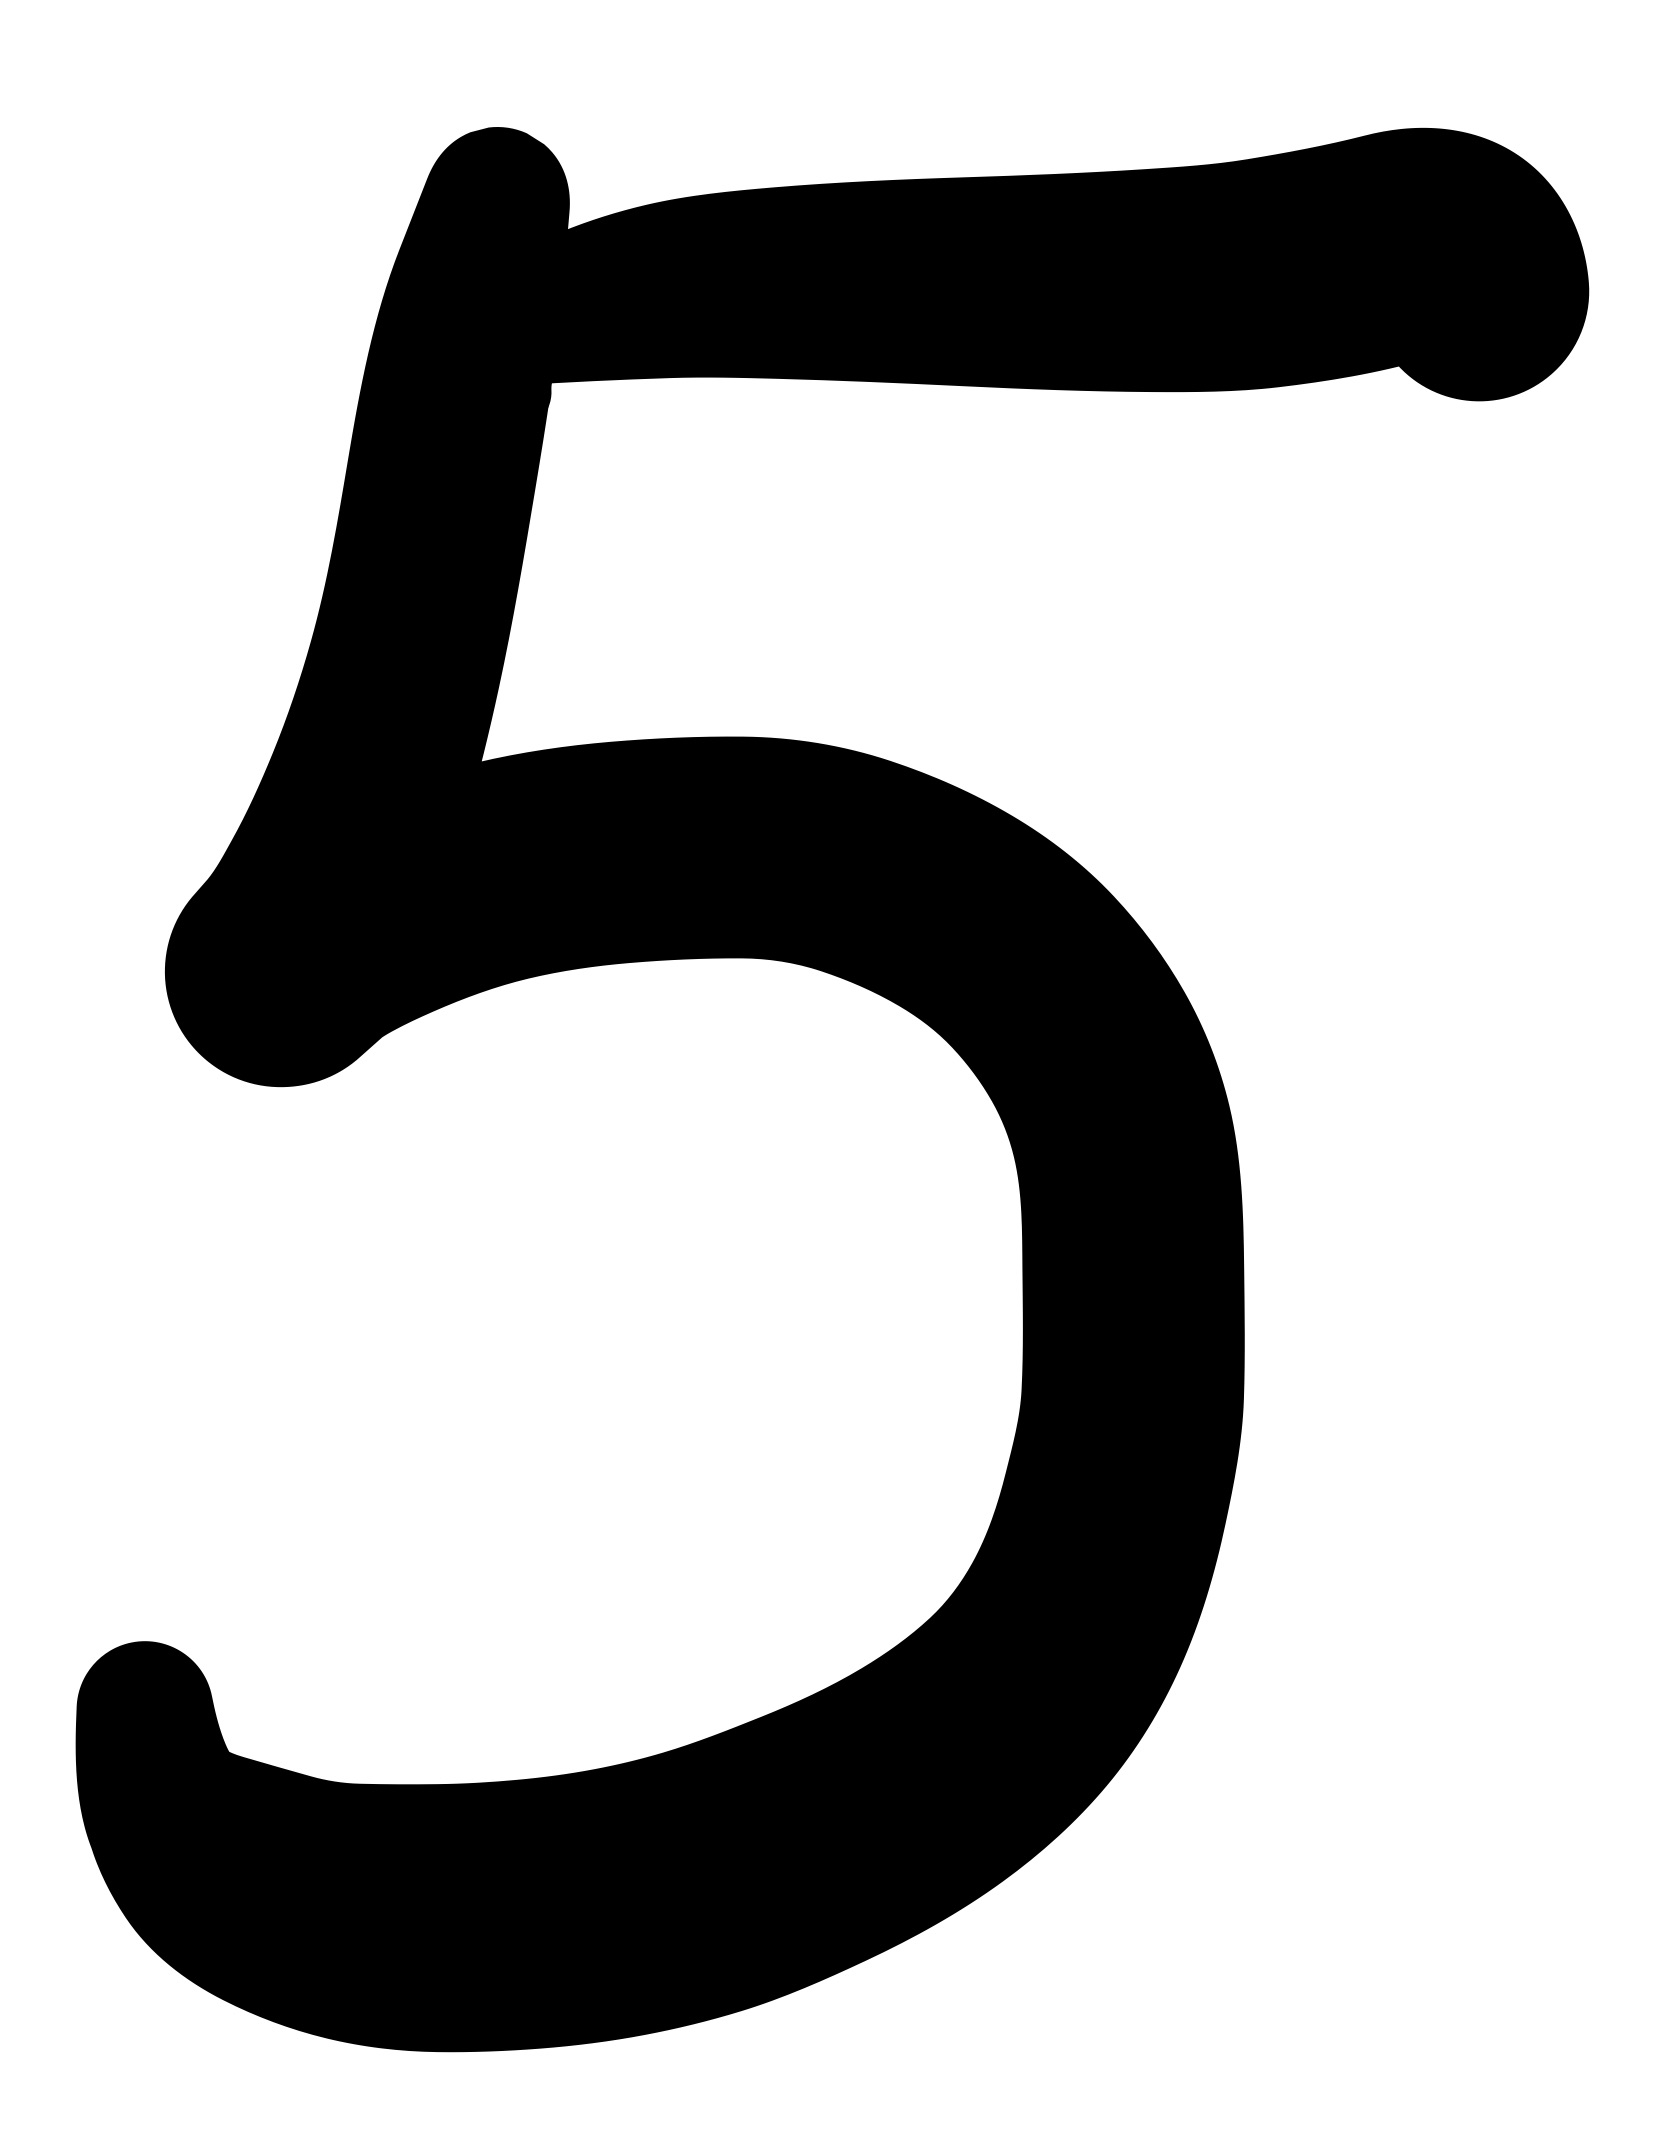

In [7]:
image2 = Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/itakumi/B4-/master/AdvancedMachineLearning/5.jpg'))
image2

Write the code to show the probability estimate $\hat{y} \in \mathbb{R}^{10}$ for the image.


In [8]:
image2 = ImageOps.invert(image2.convert('L')).resize((28,28))
transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])
# 元のモデルに合わせて次元を追加
image2 = transform(image2).unsqueeze(0)
# GPUへの転送
if torch.cuda.is_available():
    image2 = image2.to('cuda')
    model.to('cuda')

model.eval() # ネットワークを推論モードへ
# 予測を実施
output = model(image2)
_, prediction = torch.max(output, 1)
prob = torch.nn.functional.softmax(output[0], dim=0)
# 予測結果の上位5つを取得
_, indices = torch.topk(output[0], 5, dim=0)

# 結果を出力
for index in indices:
    i = index.item()
    print(i, prob[i].item())

5 1.0
3 8.115887517590181e-09
7 1.8982365689993494e-17
9 9.914397798365924e-21
8 1.5127038946337078e-22


### Image #3

Write the code to show the image #3 here.

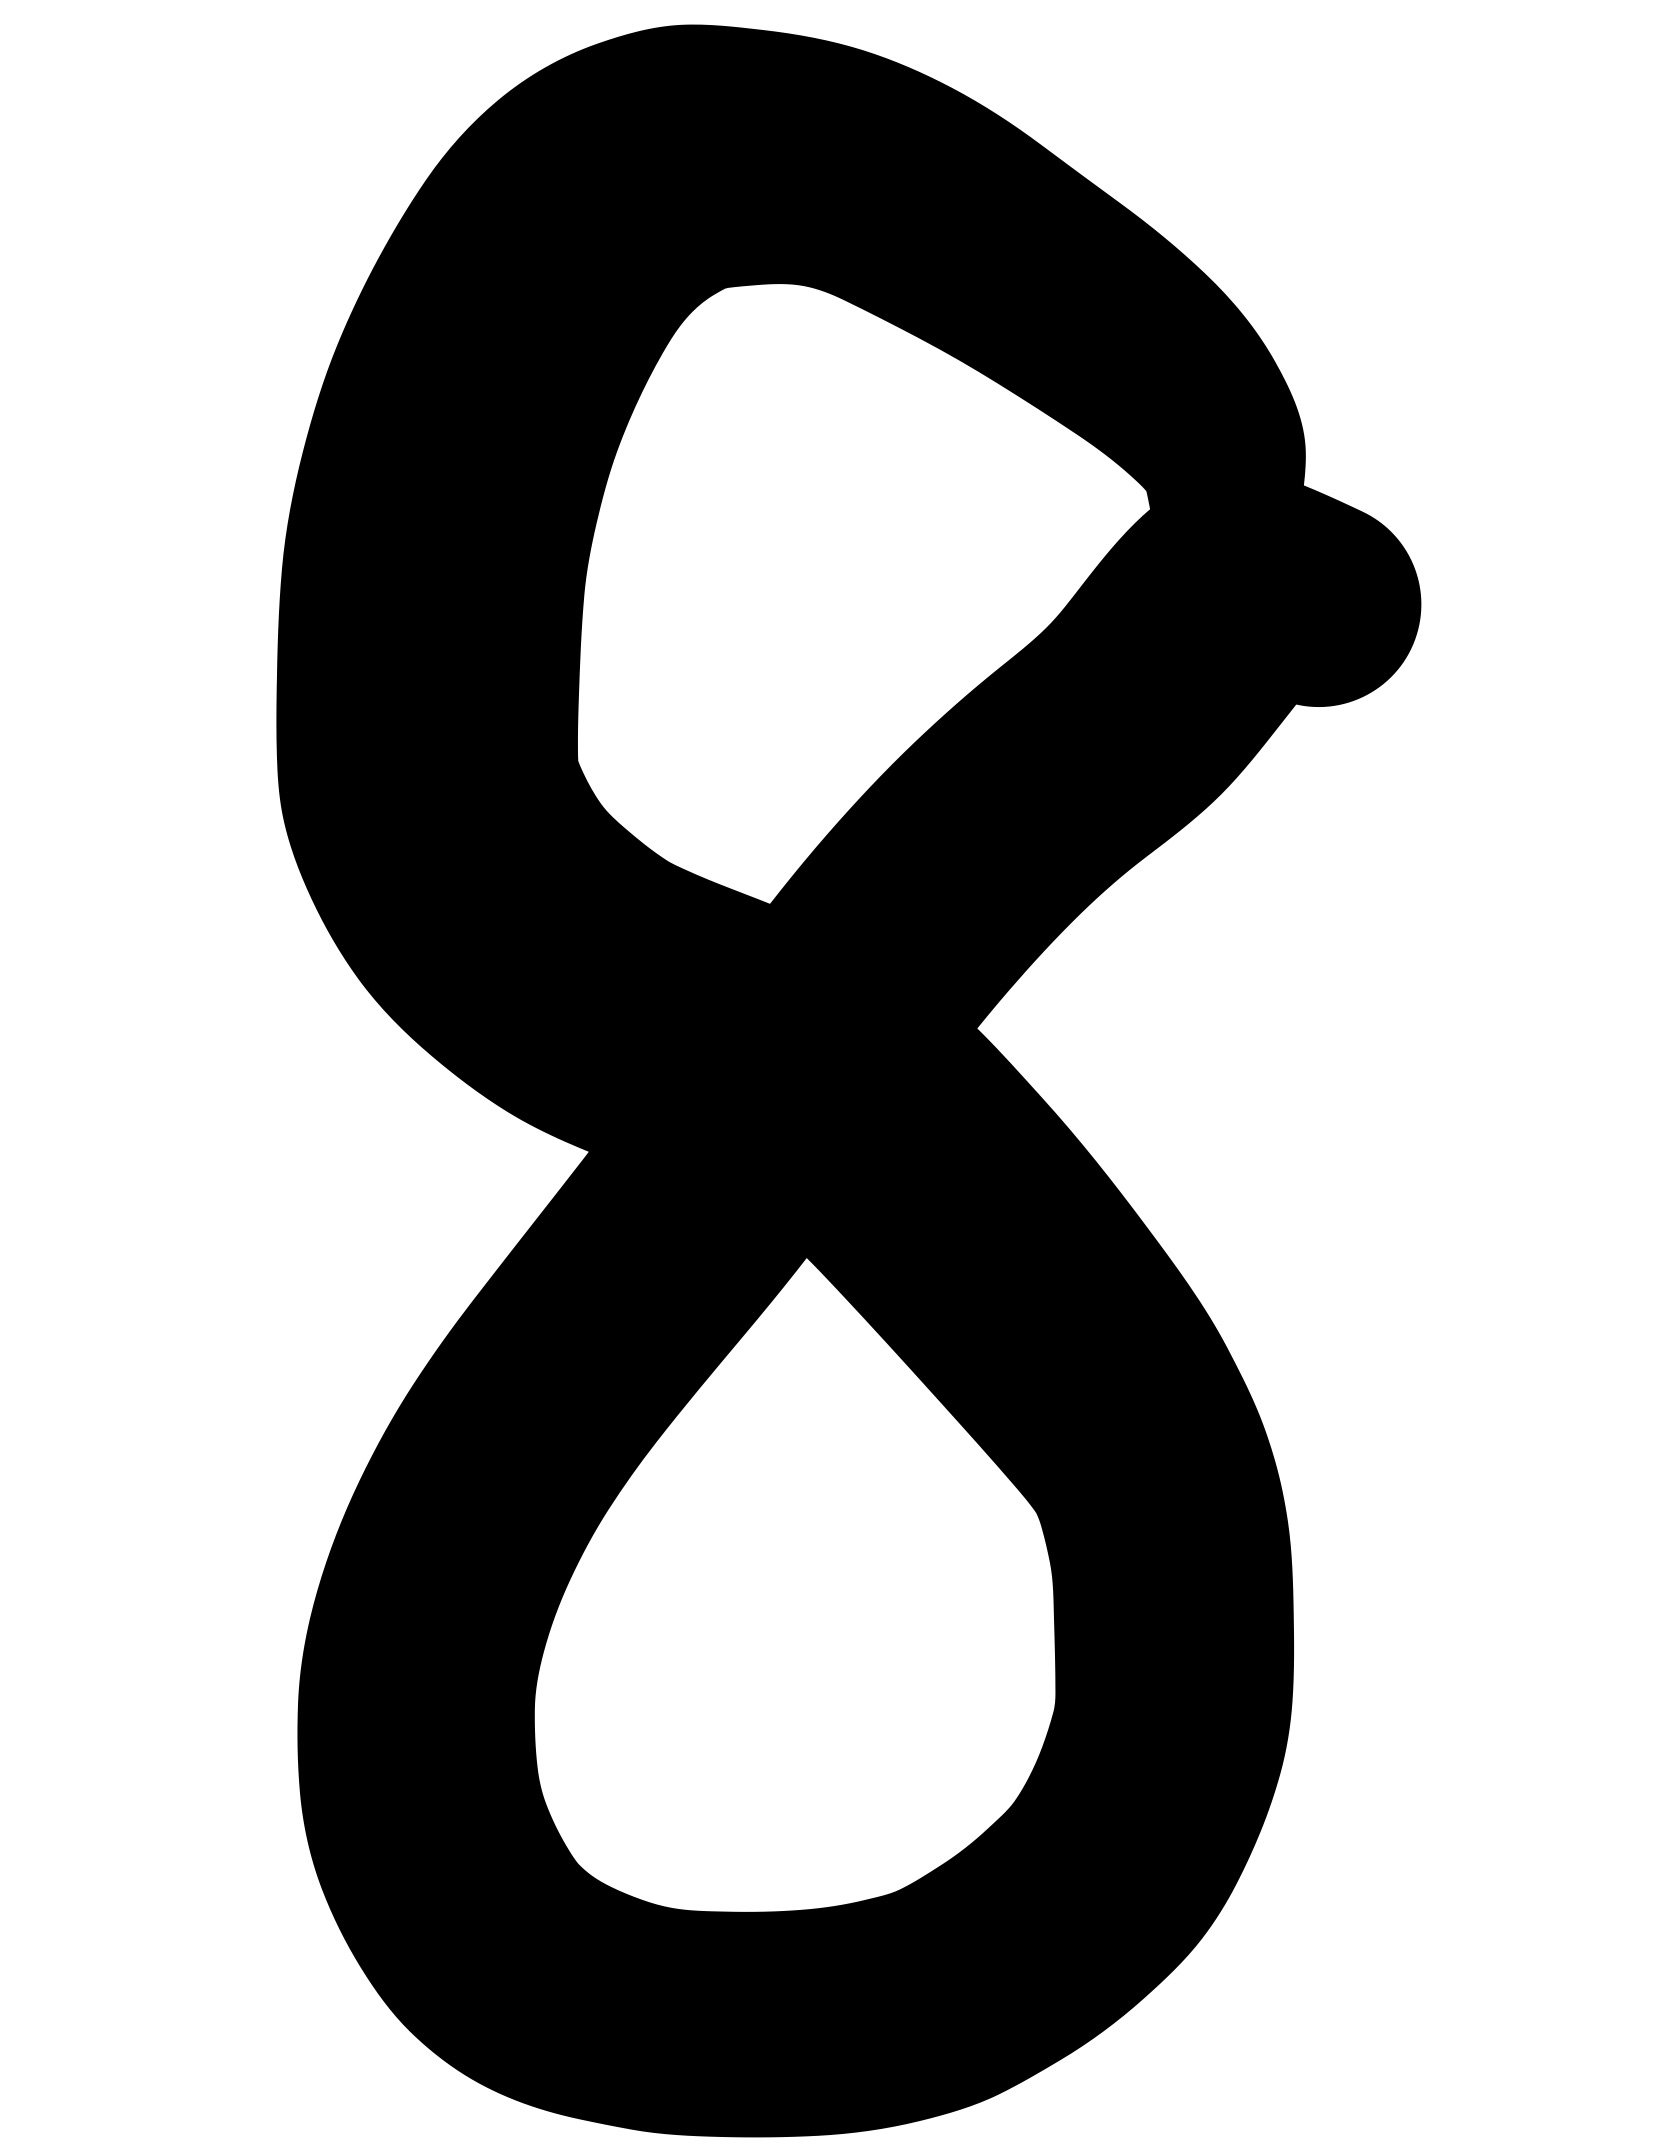

In [9]:
image3 = Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/itakumi/B4-/master/AdvancedMachineLearning/8.jpg'))
image3

Write the code to show the probability estimate $\hat{y} \in \mathbb{R}^{10}$ for the image.

In [10]:
image3 = ImageOps.invert(image3.convert('L')).resize((28,28))
transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])
# 元のモデルに合わせて次元を追加
image3 = transform(image3).unsqueeze(0)
# GPUへの転送
if torch.cuda.is_available():
    image3 = image3.to('cuda')
    model.to('cuda')

model.eval() # ネットワークを推論モードへ
# 予測を実施
output = model(image3)
_, prediction = torch.max(output, 1)
prob = torch.nn.functional.softmax(output[0], dim=0)
# 予測結果の上位5つを取得
_, indices = torch.topk(output[0], 5, dim=0)

# 結果を出力
for index in indices:
    i = index.item()
    print(i, prob[i].item())

8 0.9949060678482056
3 0.004944894462823868
2 0.0001416146260453388
5 7.38253856980009e-06
1 2.7720712836298844e-08
